# Python for Data Science

## Seaborn Data Visualization

* Seaborn is a statistical plotting library with beautiful plot styles. 
* It's designed to work well with pandas dataframe objects. 
* It's built on top of Matplotlib.
* Installation is with pip or conda at the command prompt or terminal. 
* **conda install seaborn**
* **pip install seaborn**

* Seaborn is open source. Official GitHub page is: 
https://github.com/mwaskom/seaborn
* Official documentation is: 
https://seaborn.pydata.org/
* The API reference page is: https://seaborn.pydata.org/api.html

## 1. Distribution Plots

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
# Data built in in Seaborn about customers who had a meal and left a tip

tips = sns.load_dataset('tips')

In [6]:

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


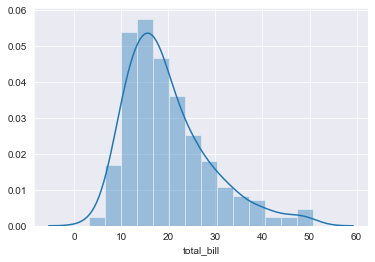

In [7]:
# A dist plot allows us to see a uni variable (one variable) kind of data
# The output is an histogram and a Kernel Density Estimation (KDE)

sns.set_style('darkgrid')
sns.distplot(tips['total_bill'])

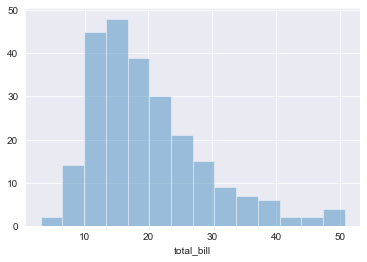

In [8]:
# To remove the KDE we can pass in a bool of False

sns.set_style('darkgrid')
sns.distplot(tips['total_bill'],kde=False)

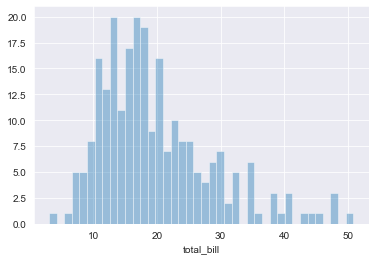

In [9]:
# To plot high bins, we can vary by passing various ints for the value bins. 

sns.set_style('darkgrid')
sns.distplot(tips['total_bill'],kde=False, bins=40)

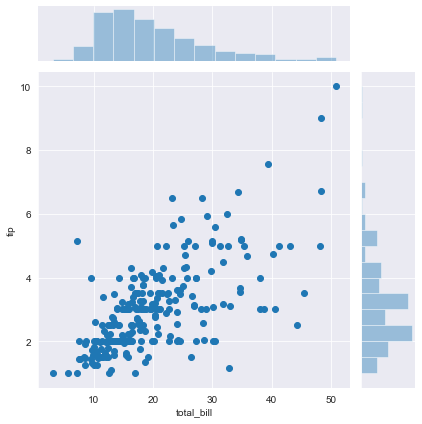

In [10]:
# Comparing 'total_bill' and 'tip'
# We get 2 distribution plots and in btwn there is a scatter plot. 
# The 'kind' parameter let's you control what is happening inside the scatter plot. 

sns.set_style('darkgrid')
sns.jointplot(x='total_bill',y='tip',data=tips)

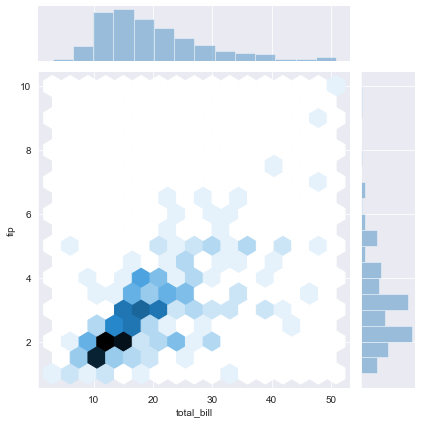

In [11]:
# The 'kind' parameter let's you control what is happening inside the scatter plot. 
# Passing hex in the parameter 'kind' gives an hexagone kind of distribution

sns.set_style('darkgrid')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

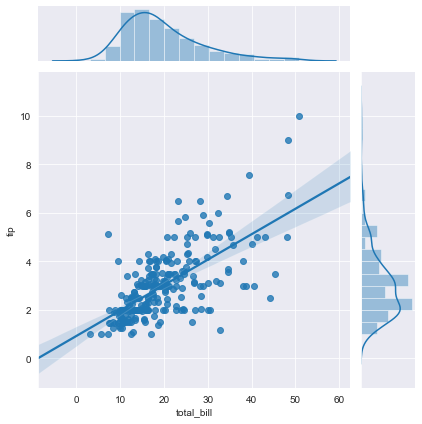

In [12]:
# To draw a regression we pass the value 'reg' for the param 'kind'

sns.set_style('darkgrid')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

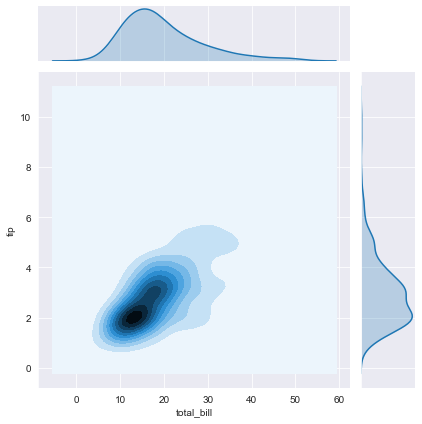

In [13]:
# By passing a 'kde' value for the kind param, we  get a 2 dimentional KDE 

sns.set_style('darkgrid')
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

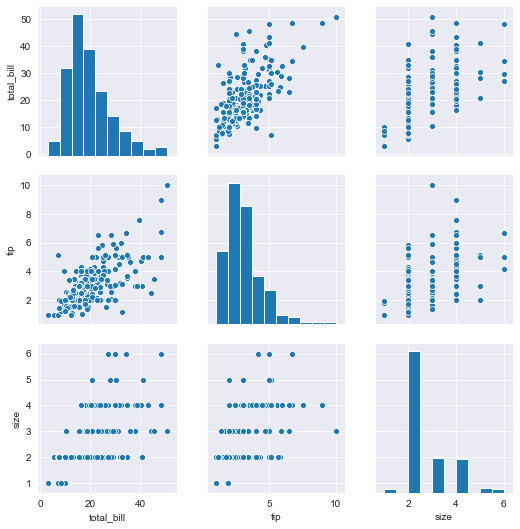

In [14]:
# A “pairs plot” is also known as a scatterplot, in which one variable in the same data row
# is matched with another variable's value

sns.set_style('darkgrid')
sns.pairplot(tips)

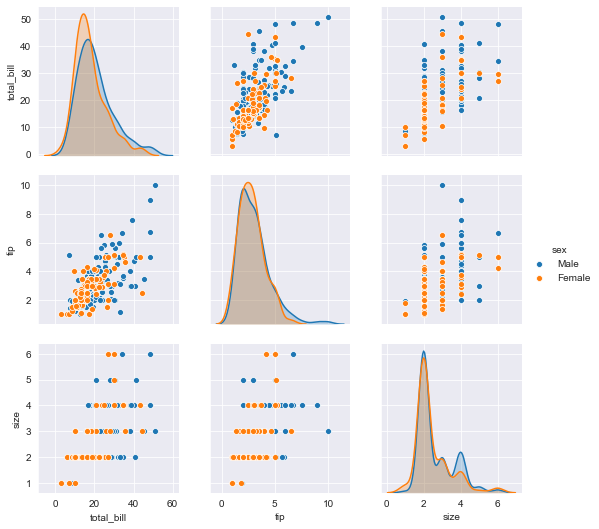

In [15]:
# pairplots can color data based on categories. e.g for tips, we have 2 categories for sex. Male and Female. 
# We use 'hue' param and pass in 'sex' obj to color code them.

sns.set_style('darkgrid')
sns.pairplot(tips, hue='sex')

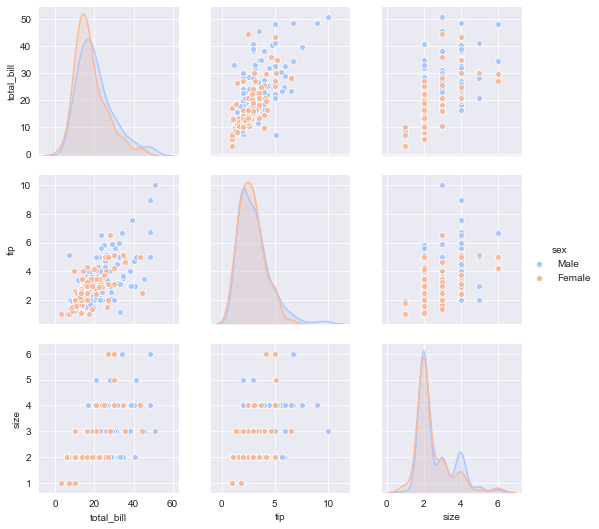

In [16]:
# We can use the 'palette' param to use different colors schemes depending on parameters.

sns.set_style('darkgrid')
sns.pairplot(tips, hue='sex', palette='coolwarm')

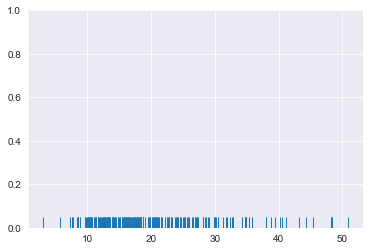

In [17]:
# A rug plot is a plot of data for a single quantitative variable, displayed as marks along an axis. 
# It is used to visualise the distribution of the data. 
# As such it is analogous to a histogram with zero-width bins, or a one-dimensional scatter plot.

sns.set_style('darkgrid')
sns.rugplot(tips['total_bill'])

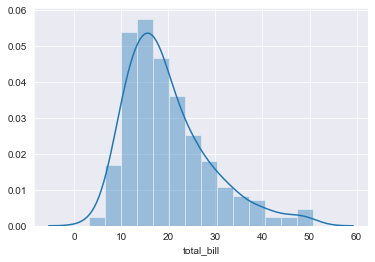

In [18]:
# Comparing a rug plot and  a distribution plot, you can see the intensity is high in the rug plot where 
# the tips are high.

sns.set_style('darkgrid')
sns.distplot(tips['total_bill'])

In [28]:
print("\n" * 5)

 * Kernel Density Estimation plots (KDE) are represented by the line on the histogram above. 
 
 * Wikipedia -> https://en.wikipedia.org/wiki/Kernel_density_estimation 
 
 * In the image below, the KDE has been obtained by summing up the small Gaussian distributions 

 <img src='files/kde_plot.png'>
 
 <center>credit: Wikipedia</center>
  


(0, 1)

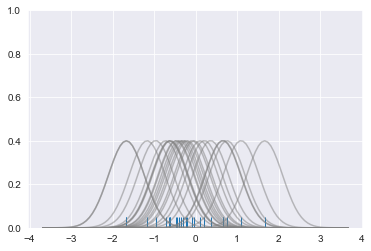

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
sns.set_style('darkgrid')
#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

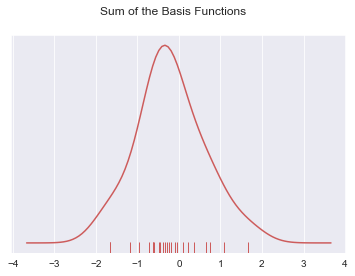

In [20]:
# To get the kde plot we can sum these basis functions.

# Apply dark grid
sns.set_style('darkgrid')
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")